# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.offline as pyo
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objects as go
from plotly.subplots import make_subplots

%config Completer.use_jedi = True
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 100)

# 2. Apa itu PPDB dan apa saja manfaatnya?

PPDB (singkatan dari Penerimaan Peserta Didik Baru) adalah salah satu agenda tahunan penerimaan murid di setiap jenjang sekolah. Metode pendaftaran sekolah melalui daring dari tingkat PAUD, TK, SD, SMP, sampai SMA/SMK. Istilah ini digunakan oleh berbagai sekolah saat ingin menerima murid baru.

Bagi Dinas Pendidikan dan Sekolah:
- Efisiensi pembiayaan dan mengurangi resiko terjadinya KKN (Korupsi, Kolusi dan Nepotisme).
- Meningkatkan reputasi sekolah.
- Memberikan akses yang luas kepada masyarakat.
- Tersedianya sebuah basis data terintegrasi bagi pihak Dinas Pendidikan maupun Sekolah dalam penyelenggaran penerimaan peserta didik baru.

Bagi Siswa dan Orang Tua Siswa:
- Mempermudah untuk melakukan pendafaran siswa baru.
- Mempermudah akses informasi penerimaan siswa baru.
- Pendaftaran menjadi lebih tertib dan mudah dipantau.
- Fasilitas dan pelayanan memuaskan dari pihak Sekolah dan Dinas Pendidikan.

In [2]:
df = pd.read_csv('data_ppdb_revisi.csv')
n = 5
df.sample(n)
# sumber data dari https://arsip.siap-ppdb.com/2021/jakarta/#/ dengan mendesain ulang beberapa kolom dan value nya

,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Asal SMP,Jalur Daftar,Status
8126,39,200107200320284,JORGI AGUTSO PATTISELANNO,Cawang,7.0,10.0,3.0,12 th 10 bl 15 hr,SMP Negeri 268,Zonasi,Daftar Ulang
6650,2,200107202450012,CHRISTIAN ADIWIJAYA OBED SAUDALE,Lubang Buaya,9.0,3.0,2.0,12 th 10 bl 28 hr,SMP Negeri 246,Zonasi,Daftar Ulang
3481,20,200107201100129,MOCHAMMAD IRFAN FADILA,Kelapa Dua Wetan,9.0,3.0,3.0,13 th 11 bl 08 hr,SMP Negeri 106,Zonasi,Daftar Ulang
2233,8,200103200590009,RISKY SAPUTRA,Cawang,NaN,NaN,NaN,12 th 10 bl 16 hr,SMP Negeri 50,Inklusi,Daftar Ulang
697,6,200105200320017,SHAKIRA ALTHAFUNNISSA,Batu Ampar,2.0,NaN,NaN,12 th 11 bl 10 hr,150,Non Akademik,Daftar Ulang


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11925 entries, 0 to 11924
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Peringkat          11925 non-null  int64  
 1   Nomer Pendaftaran  11925 non-null  int64  
 2   Nama               11925 non-null  object 
 3   Kelurahan          11832 non-null  object 
 4   RW                 11805 non-null  float64
 5   RT                 8412 non-null   float64
 6   Prioritas Zonasi   7189 non-null   float64
 7   Umur               11925 non-null  object 
 8   Asal SMP           11925 non-null  object 
 9   Jalur Daftar       11925 non-null  object 
 10  Status             11925 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 1.0+ MB


# 3. Cleaning Data

Pembersihan data adalah salah satu subtugas paling penting dari setiap project seorang data scientist, data analyst, dan data engineer. Meskipun ini bisa menjadi proses yang sangat membosankan, tetapi proses ini tidak boleh diremehkan.

Dengan melihat sampel dari baris kumpulan data (dari tugas di atas), saya mengamati bahwa beberapa value di kolom seperti kolom `Asal SMP` ada value yang tidak teratur dan beda dengan value pada umumnya. Itu baru terlihat di kolom `Asal SMP` belum lagi di kolom yang lainnya.

Oleh karena itu, sekarang kita lanjutkan untuk membersihkan data kita. Khususnya, karakter yang kelebihan space atau ada nama Kelurahan yang typo.

## 3.1 Cleaning Column `Kelurahan`

In [4]:
df['Kelurahan'].value_counts().tail(50)

cijantung               1
Kedaung Kali Angke      1
Duri Pulo               1
Pondok Labu             1
Cipulir                 1
Srengseng               1
Malaka Jaya             1
Srengsen Sawah          1
Rawamangun              1
Manggarai               1
Sukabumi Selatan        1
Jelambar                1
Kebayoran Lama Utara    1
Kebon Kosong            1
Pasar Manggis           1
Bendungan Hilir         1
Ancol                   1
Tomang                  1
Kramat Pela             1
Papango                 1
Utan Kayu utara         1
Kebon Pala              1
Kebayoran Lama          1
Pondok Bambu            1
Penjaringan             1
 Pejaten Barat          1
Semper Barat            1
Bintaro                 1
Meruya Utara            1
Slipi                   1
Kepala Dua wetan        1
Gandaria Utara          1
Kelapa Dua Wetan        1
Rawa Bunga              1
Cilandak Badak          1
Pisangan Timur          1
Cipinang Muara          1
Cipinang Besar          1
Kampung Bali

In [5]:
df['Kelurahan'] = df['Kelurahan'].str.strip() # memangkas value Kelurahan yang kelebihan spasi
df['Kelurahan'] = df['Kelurahan'].str.title() # Mengonversi karakter pertama menjadi huruf besar dan sisanya menjadi huruf kecil.
df['Kelurahan'].replace({'Cilitan':'Cililitan', 'cijantung':'Cijantung', 'Srengsen Sawah':'Srengseng Sawah', 'pinang ranti':'Pinang Ranti',
                         'Cililtan':'Cililitan', 'Duri selatan':'Duri Selatan', 'Cilandak Badak':'Cilandak Barat', 'Kepala Dua Wetan':'Kelapa Dua Wetan',
                         'Cipinang Besar':'Cipinang Besar Utara', 'Utan Kayu utara':'Utan Kayu Utara', 'Gedonga':'Gedong',
                         'Tanjung barat':'Tanjung Barat', 'Balekambang':'Bale kambang'},inplace=True)

## 3.2 Cleaning Column `RW`

In [6]:
df['RW'].value_counts() #tujuannya adalah untuk mencari null value. jika ada null value maka di isi dengan angka 0

3.0     1578
2.0     1555
1.0     1459
4.0     1330
5.0     1035
6.0     1018
9.0      872
7.0      863
10.0     695
8.0      581
11.0     424
12.0     222
15.0      58
13.0      44
14.0      32
16.0      30
17.0       4
18.0       3
19.0       2
Name: RW, dtype: int64

In [7]:
df['RW'] = df['RW'].fillna(0) #null value di isi angka 0 agar tipe datanya bisa diubah dari float menjadi integer
df['RW'] = df['RW'].astype(int) #syntax mengubah tipe data dari float menjadi integer

## 3.3 Cleaning Column `RT`

In [8]:
df['RT'].value_counts() #tujuannya adalah untuk mencari null value. jika ada null value maka di isi dengan angka 0

3.0     769
1.0     742
2.0     711
4.0     709
6.0     701
8.0     695
5.0     687
7.0     685
9.0     545
10.0    500
11.0    477
12.0    361
14.0    250
13.0    245
15.0    148
16.0     94
17.0     59
18.0     25
19.0      9
Name: RT, dtype: int64

In [9]:
df['RT'] = df['RT'].fillna(0) #null value di isi angka 0 agar tipe datanya bisa diubah dari float menjadi integer
df['RT'] = df['RT'].astype(int) #syntax mengubah tipe data dari float menjadi integer

## 3.4 Cleaning Column `Asal SMP`

In [10]:
df['Asal SMP'].value_counts() #melihat nama value yang ada, apakah sudah seragam atau masih berantakan

35                403
SMP Negeri 259    364
281               348
SMP Negeri 257    329
239               329
49                328
SMP Negeri 81     328
SMP Negeri 179    326
SMP Negeri 268    325
SMP Negeri 184    323
20                312
182               294
210               294
150               291
SMP Negeri 106    290
126               290
SMP Negeri 275    289
SMP Negeri 209    286
SMP Negeri 263    256
SMP Negeri 174    255
41                254
218               253
SMP Negeri 80     253
SMP Negeri 272    252
SMP Negeri 214    252
SMP Negeri 171    251
SMP Negeri 222    223
SMP Negeri 102    221
24                221
SMP Negeri 246    220
227               220
SMP Negeri 208    219
154               218
107               218
SMP Negeri 217    218
238               218
SMP Negeri 223    217
SMP Negeri 287    217
SMP Negeri 251    217
SMP Negeri 128    216
163               214
SMP Negeri 103    183
SMP Negeri 203    182
SMP Negeri 188    181
155               181
SMP Negeri

In [11]:
chek = 'satu,dua,tiga,222'
chek.split(',')[-1]

'222'

In [12]:
def get_smp(row):
    return row.split(' ')[-1]

In [13]:
df['Asal SMP'] = df['Asal SMP'].apply(lambda x: x.split(' ')[-1]) # ambil smp bisa pakai cara lambda 
df['Asal SMP'] = df['Asal SMP'].apply(get_smp) # ambil smp bisa pakai cara invoke function 

In [14]:
df['Asal SMP'].value_counts()

35     403
259    364
281    348
257    329
239    329
49     328
81     328
179    326
268    325
184    323
20     312
182    294
210    294
150    291
106    290
126    290
275    289
209    286
263    256
174    255
41     254
218    253
80     253
272    252
214    252
171    251
222    223
102    221
24     221
246    220
227    220
208    219
154    218
107    218
217    218
238    218
223    217
287    217
251    217
128    216
163    214
103    183
203    182
188    181
155    181
50     146
Name: Asal SMP, dtype: int64

## 3.5 Cleaning Column `Jalur Daftar`

In [15]:
df['Jalur Daftar'].value_counts() #melihat nama value yang ada, apakah sudah seragam atau masih berantakan

Zonasi                               5685
KJP                                  1663
Akademik                             1576
Afirmasi (KJP)                        632
Tahap Kedua                           478
Prestasi (Akademik)                   477
Non Akademik                          443
KJP                                   432
Prestasi (Non Akademik)               133
Inklusi                               114
Afirmasi (Inklusi)                     61
Akademik                               58
Pindah Tugas Orangtua                  56
Jalur Kedua                            44
Pindah Tugas Orangtua & Anak Guru      28
Inklusi                                14
Non Akademik                           12
Pindahan Tugas Orangtua                 9
Tahap Kedua                             9
Afirmasi (Anak Panti)                   1
Name: Jalur Daftar, dtype: int64

In [16]:
df['Jalur Daftar'] = df['Jalur Daftar'].str.strip() #memangkas kelebihan spasi. karena berdasarkan hasil value counts ada 2 value KJP yang sama

In [17]:
df['Jalur Daftar'].value_counts() #memastikan kembali apakah ada yang masih kelebihan spasi atau tidak

Zonasi                               5685
KJP                                  2095
Akademik                             1634
Afirmasi (KJP)                        632
Tahap Kedua                           487
Prestasi (Akademik)                   477
Non Akademik                          455
Prestasi (Non Akademik)               133
Inklusi                               128
Afirmasi (Inklusi)                     61
Pindah Tugas Orangtua                  56
Jalur Kedua                            44
Pindah Tugas Orangtua & Anak Guru      28
Pindahan Tugas Orangtua                 9
Afirmasi (Anak Panti)                   1
Name: Jalur Daftar, dtype: int64

In [18]:
df['Jalur Daftar'].replace(['KJP', 'Akademik', 'Non Akademik', 'Inklusi', 'Pindah Tugas Orangtua', 'Pindahan Tugas Orangtua', 'Jalur Kedua'], 
                           ['Afirmasi (KJP)', 'Prestasi (Akademik)', 'Prestasi (Non Akademik)', 'Afirmasi (Inklusi)', 'Pindah Tugas Orangtua & Anak Guru', 
                            'Pindah Tugas Orangtua & Anak Guru', 'Tahap Kedua'], inplace=True)
# mengubah nama value sesuai dengan PPDB DKI Jakarta

In [19]:
df['Jalur Daftar'].value_counts() # memastikan kembali apakah value sudah sesuai dengan PPDB DKI Jakarta atau belum

Zonasi                               5685
Afirmasi (KJP)                       2727
Prestasi (Akademik)                  2111
Prestasi (Non Akademik)               588
Tahap Kedua                           531
Afirmasi (Inklusi)                    189
Pindah Tugas Orangtua & Anak Guru      93
Afirmasi (Anak Panti)                   1
Name: Jalur Daftar, dtype: int64

## 3.6 Cleaning Column `Status`

In [20]:
df['Status'].value_counts()

Daftar Ulang          11602
Tidak Daftar Ulang      179
Daftar Ulang            137
Pindah sekolah            3
Pindah Ke 49              3
Tidak Naik Kelas          1
Name: Status, dtype: int64

In [21]:
df['Status'] = df['Status'].str.strip() # memangkas kelebihan spasi berdasarkan value Daftar Ulang
df['Status'] = df['Status'].str.title() # value Pindah Sekolah, huruf s pada sekolah masih huruf kecil bukan kapital

In [22]:
df['Status'].value_counts() # memastikan kembali apakah value sudah sesuai dengan kemauan pribadi atau belum
# sumber data pindah sekolah & pindah ke 49 di dapatkan dari teman adik yang memang saling kenal sehingga data yang didapatkan valid

Daftar Ulang          11739
Tidak Daftar Ulang      179
Pindah Sekolah            3
Pindah Ke 49              3
Tidak Naik Kelas          1
Name: Status, dtype: int64

## 3.7 Memastikan apakah tipe data sudah tepat atau belum

In [23]:
df.dtypes

Peringkat              int64
Nomer Pendaftaran      int64
Nama                  object
Kelurahan             object
RW                     int32
RT                     int32
Prioritas Zonasi     float64
Umur                  object
Asal SMP              object
Jalur Daftar          object
Status                object
dtype: object

# 4. Membuat kolom baru yaitu kolom `Umur Convert`

Salah 1 langkah untuk memudahkan dalam proses mengurutkan umur yaitu dengan membuat kolom baru yang isinya adalah umur tiap siswa dengan catatan sudah menjadi tipe data float dan diberi nama dengan kolom `Umur Convert`. Perbedaan kolom `Umur` dengan `Umur Convert` yaitu jika kolom `Umur` merupakan kolom asli seperti yang ada di website https://arsip.siap-ppdb.com/ sedangkan kolom `Umur Convert` merupakan kolom umur dengan merubah tipe data menjadi float agar value nya bisa sort baik secara ascending maupun descending sehingga memudahkan dalam analisa.

In [24]:
df[['umur tahun','ket1','umur bulan','ket2','umur hari','ket3', 'nan']] = df.Umur.str.split(' ',expand=True)

In [25]:
df = df.drop(columns = ['ket1','ket2','ket3','nan'])

In [26]:
df['umur tahun'] = df['umur tahun'].astype('float')
df['umur bulan'] = df['umur bulan'].astype('float')
df['umur hari'] =  df['umur hari'].astype('float')
df['umur bulan'] = df['umur bulan']/12
df['umur hari'] =  df['umur hari']/365

In [27]:
df['Umur Convert'] = df['umur tahun'] + df['umur bulan'] + df['umur hari']

In [28]:
df = df.sort_values(by='Umur Convert', ascending=False).reset_index(drop=True)
#df = df.drop(columns='index')

In [29]:
df = df[['Peringkat', 'Nomer Pendaftaran', 'Nama', 'Kelurahan', 'RW', 'RT', 'Prioritas Zonasi', 'Umur',
         'Umur Convert', 'Asal SMP', 'Jalur Daftar', 'Status', 'umur tahun', 'umur bulan', 'umur hari']]
df

,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Umur Convert,Asal SMP,Jalur Daftar,Status,umur tahun,umur bulan,umur hari
0,2,200103202110003,IRPAN,Kelapa Dua Wetan,8,0,NaN,16 th 01 bl 17 hr,16.129909,210,Afirmasi (Inklusi),Daftar Ulang,16.0,0.083333,0.046575
1,1,200103201850007,GRINAR HENDRI SAPUTRA,Pekayon,3,0,NaN,15 th 08 bl 26 hr,15.737900,184,Afirmasi (Inklusi),Daftar Ulang,15.0,0.666667,0.071233
2,1,200103200320003,MUHAMMAD ABDUL RAHMAN,Batu Ampar,4,0,3.0,15 th 00 bl 28 hr,15.076712,20,Afirmasi (Inklusi),Daftar Ulang,15.0,0.000000,0.076712
3,17,200102200360004,MUZAKY HISBULLAH WIDIANTO,Dukuh,5,9,3.0,14 th 11 bl 29 hr,14.996119,24,Afirmasi (KJP),Daftar Ulang,14.0,0.916667,0.079452
4,1,200107202180018,AHMAD FAJRI,Jati Padang,8,6,1.0,14 th 11 bl 24 hr,14.982420,218,Zonasi,Daftar Ulang,14.0,0.916667,0.065753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11920,7,200104201280204,ZIYAD TRYSTAN RABBANI SARWONO,Batu Ampar,4,0,NaN,11 th 00 bl 03 hr,11.008219,126,Prestasi (Akademik),Tidak Daftar Ulang,11.0,0.000000,0.008219
11921,54,200104201070065,FATUR DWI AGENG SELO,Baru,1,0,NaN,11 th 00 bl 00 hr,11.000000,179,Prestasi (Akademik),Daftar Ulang,11.0,0.000000,0.000000
11922,28,200104201070085,BINTANG RASALHAGUE,Ciracas,7,0,NaN,10 th 11 bl 27 hr,10.990639,174,Prestasi (Akademik),Daftar Ulang,10.0,0.916667,0.073973
11923,11,200104201830335,MUHAMMAD SYAHMI TRIHANDOKO,Tanjung Barat,5,0,NaN,10 th 09 bl 07 hr,10.769178,154,Prestasi (Akademik),Daftar Ulang,10.0,0.750000,0.019178


# 5. Klasifikasi zonasi berdasarkan zonasi 1, zonasi 2, dan zonasi 3

Untuk Memudahkan analisa, alangkah baiknya membuat kolom baru yang valuenya hanya berisi `Zonasi 1`, `Zonasi 2`, `Zonasi 3`, dan `Belum Diketahui`. Tujuannya adalah untuk mengetahui siapa saja yang sudah masuk di `zonasi 1 dan 2`. Jika sudah didapatkan nama-nama yang masuk kedalam `zonasi 1 dan 2`, maka kemungkinan besar mereka tidak akan memilih sekolah yang diluar cakupannya yaitu `zonasi 3`. Kecuali jika nama-nama tersebut mendaftar melalui `jalur prestasi` atau `jalur afirmasi`.

## 5.1 Klasifikasi SMA 51

In [30]:
df_51 = df[df['Kelurahan'].isin(['Batu Ampar', 'Bale Kambang', 'Pejaten Barat', 'Pejaten Timur', 'Cawang', 'Cililitan', 'Gedong', 'Rawajati', 
                                 'Kalibata', 'Kramat Jati', 'Tengah'])].sort_values('Umur Convert', ascending=False).reset_index()
df_51.head()

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Umur Convert,Asal SMP,Jalur Daftar,Status,umur tahun,umur bulan,umur hari
0,2,1,200103200320003,MUHAMMAD ABDUL RAHMAN,Batu Ampar,4,0,3.0,15 th 00 bl 28 hr,15.076712,20,Afirmasi (Inklusi),Daftar Ulang,15.0,0.000000,0.076712
1,5,1,200103201280002,TRI ZAHRINI,Batu Ampar,0,0,3.0,14 th 11 bl 23 hr,14.979680,126,Afirmasi (Inklusi),Daftar Ulang,14.0,0.916667,0.063014
2,7,8,200107200590084,ARVA SABILLILAH,Cililitan,7,12,3.0,14 th 11 bl 13 hr,14.952283,50,Zonasi,Daftar Ulang,14.0,0.916667,0.035616
3,8,15,200102200060218,ANGGI PRATIWI,Kramat Jati,11,10,2.0,14 th 10 bl 29 hr,14.912785,49,Afirmasi (KJP),Tidak Naik Kelas,14.0,0.833333,0.079452
4,9,39,200102201640058,AHMAD FIQRI,Pejaten Timur,8,7,3.0,14 th 10 bl 27 hr,14.907306,163,Afirmasi (KJP),Daftar Ulang,14.0,0.833333,0.073973


In [31]:
def status_zone(row):
    if row['Kelurahan'] == 'Batu Ampar':
        if (row['RT'] in [12]) & (row['RW'] in [2]):
            return 'Zonasi 1'
        elif (row['RT'] in [15]) & (row['RW'] in [5]):
            return 'Zonasi 1'
        elif (row['RT'] in [7]) & (row['RW'] in [4]):
            return 'Zonasi 1'
        elif (row['RT'] in [11]) & (row['RW'] in [4]):
            return 'Zonasi 1'
        elif (row['RT'] in [11]) & (row['RW'] in [2]):
            return 'Zonasi 1'
        elif (row['RT'] in [10]) & (row['RW'] in [2]):
            return 'Zonasi 1'
        elif (row['RT'] in [9]) & (row['RW'] in [2]):
            return 'Zonasi 1'
        elif (row['RT'] in [14]) & (row['RW'] in [2]):
            return 'Zonasi 1'
        elif (row['RT'] in [1]) & (row['RW'] in [4]):
            return 'Zonasi 2'
        elif (row['RT'] in [9]) & (row['RW'] in [3]):
            return 'Zonasi 2'
        elif (row['RT'] in [6]) & (row['RW'] in [5]):
            return 'Zonasi 2'
        elif (row['RT'] in [5]) & (row['RW'] in [5]):
            return 'Zonasi 2'
        elif (row['RT'] in [8]) & (row['RW'] in [2]):
            return 'Zonasi 2'
        elif (row['RT'] in [15]) & (row['RW'] in [2]):
            return 'Zonasi 2'
        elif (row['RT'] in [17]) & (row['RW'] in [2]):
            return 'Zonasi 2'
        elif (row['RT'] in [1]) & (row['RW'] in [6]):
            return 'Zonasi 2'
        elif (row['RT'] in [10]) & (row['RW'] in [4]):
            return 'Zonasi 2'
        elif (row['RT'] in [13]) & (row['RW'] in [4]):
            return 'Zonasi 2'
        elif (row['RT'] in [4]) & (row['RW'] in [4]):
            return 'Zonasi 2'
        elif (row['RT'] in [6]) & (row['RW'] in [4]):
            return 'Zonasi 2'
        elif (row['RT'] in [12]) & (row['RW'] in [4]):
            return 'Zonasi 2'
    if row['Jalur Daftar'] == 'Zonasi':
        if (row['Kelurahan'] in ['Batu Ampar', 'Bale Kambang', 'Pejaten Barat', 'Pejaten Timur', 'Cawang', 'Cililitan', 'Gedong', 'Rawajati', 'Kalibata', 'Kramat Jati', 'Tengah']):
            return 'Zonasi 3'
    if row['Jalur Daftar'] == 'Afirmasi (KJP)':
        if (row['Kelurahan'] in ['Batu Ampar', 'Bale Kambang', 'Pejaten Barat', 'Pejaten Timur', 'Cawang', 'Cililitan', 'Gedong', 'Rawajati', 'Kalibata', 'Kramat Jati', 'Tengah']):
            return 'Zonasi 3'
    else:
        return 'Belum Diketahui'

In [32]:
df_51['Status Zonasi'] = df_51.apply(status_zone,axis=1)

In [33]:
df_51.loc[df_51['Status Zonasi'].isnull()].head() # Untuk mengetahui baris mana yang memiliki NaN di kolom tertentu

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Umur Convert,Asal SMP,Jalur Daftar,Status,umur tahun,umur bulan,umur hari,Status Zonasi


In [34]:
df_51

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Umur Convert,Asal SMP,Jalur Daftar,Status,umur tahun,umur bulan,umur hari,Status Zonasi
0,2,1,200103200320003,MUHAMMAD ABDUL RAHMAN,Batu Ampar,4,0,3.0,15 th 00 bl 28 hr,15.076712,20,Afirmasi (Inklusi),Daftar Ulang,15.0,0.000000,0.076712,Belum Diketahui
1,5,1,200103201280002,TRI ZAHRINI,Batu Ampar,0,0,3.0,14 th 11 bl 23 hr,14.979680,126,Afirmasi (Inklusi),Daftar Ulang,14.0,0.916667,0.063014,Belum Diketahui
2,7,8,200107200590084,ARVA SABILLILAH,Cililitan,7,12,3.0,14 th 11 bl 13 hr,14.952283,50,Zonasi,Daftar Ulang,14.0,0.916667,0.035616,Zonasi 3
3,8,15,200102200060218,ANGGI PRATIWI,Kramat Jati,11,10,2.0,14 th 10 bl 29 hr,14.912785,49,Afirmasi (KJP),Tidak Naik Kelas,14.0,0.833333,0.079452,Zonasi 3
4,9,39,200102201640058,AHMAD FIQRI,Pejaten Timur,8,7,3.0,14 th 10 bl 27 hr,14.907306,163,Afirmasi (KJP),Daftar Ulang,14.0,0.833333,0.073973,Zonasi 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,11915,59,200102202100046,REZA DWI PERMANA,Tengah,7,6,NaN,11 th 01 bl 09 hr,11.107991,209,Afirmasi (KJP),Daftar Ulang,11.0,0.083333,0.024658,Zonasi 3
3598,11918,9,200104202230079,ANANDA ZHAKI IBRAHIM,Gedong,3,0,NaN,11 th 00 bl 18 hr,11.049315,257,Prestasi (Akademik),Daftar Ulang,11.0,0.000000,0.049315,Belum Diketahui
3599,11919,22,200107201640050,YUANITA VERA FIRDAYANTI,Kalibata,8,4,2.0,11 th 00 bl 11 hr,11.030137,182,Zonasi,Daftar Ulang,11.0,0.000000,0.030137,Zonasi 3
3600,11920,7,200104201280204,ZIYAD TRYSTAN RABBANI SARWONO,Batu Ampar,4,0,NaN,11 th 00 bl 03 hr,11.008219,126,Prestasi (Akademik),Tidak Daftar Ulang,11.0,0.000000,0.008219,Belum Diketahui


## 5.2 Klasifikasi SMA 62

In [35]:
df_62 = df[df['Kelurahan'].isin(['Kramat Jati', 'Dukuh', 'Makasar', 'Bale Kambang', 'Batu Ampar', 'Cawang', 'Cililitan', 'Rambutan', 'Gedong',
                                'Pinang Ranti', 'Kebon Pala', 'Tengah'])].sort_values('Umur Convert', ascending=False).reset_index()
df_62.sample(5)

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Umur Convert,Asal SMP,Jalur Daftar,Status,umur tahun,umur bulan,umur hari
3,6,6,200107202690014,KURNIAWAN DIANSAH,Pinang Ranti,1,2,3.0,14 th 11 bl 16 hr,14.960502,272,Zonasi,Daftar Ulang,14.0,0.916667,0.043836
1596,4474,8,200104200360017,NAZWA ANNISA PUTRI,Rambutan,5,0,NaN,12 th 11 bl 04 hr,12.927626,24,Prestasi (Akademik),Daftar Ulang,12.0,0.916667,0.010959
3200,8117,54,200107200590151,ZAKIA RIZKI MAULIDA,Cawang,2,10,3.0,12 th 07 bl 07 hr,12.602511,80,Zonasi,Daftar Ulang,12.0,0.583333,0.019178
2508,6615,96,200107201510096,VICKRY OKTAVIANUS VITO TUKAN,Makasar,1,3,3.0,12 th 08 bl 30 hr,12.748858,150,Zonasi,Daftar Ulang,12.0,0.666667,0.082192
1255,3539,8,200104200360190,JUNANTA MARCELINO SEMBIRING,Dukuh,4,0,NaN,13 th 00 bl 05 hr,13.013699,263,Prestasi (Akademik),Daftar Ulang,13.0,0.000000,0.013699


In [36]:
def status_zone62(row):
    if row['Kelurahan'] == 'Kramat Jati':
        if (row['RT'] in [3]) & (row['RW'] in [11]):
            return 'Zonasi 1'
        elif (row['RT'] in [7]) & (row['RW'] in [11]):
            return 'Zonasi 1'
        elif (row['RT'] in [10]) & (row['RW'] in [11]):
            return 'Zonasi 1'
        elif (row['RT'] in [18]) & (row['RW'] in [11]):
            return 'Zonasi 1'
        elif (row['RT'] in [12]) & (row['RW'] in [11]):
            return 'Zonasi 1'
        elif (row['RT'] in [15]) & (row['RW'] in [11]):
            return 'Zonasi 1'
        elif (row['RT'] in [14]) & (row['RW'] in [11]):
            return 'Zonasi 1'
        elif (row['RT'] in [17]) & (row['RW'] in [11]):
            return 'Zonasi 2'
        elif (row['RT'] in [11]) & (row['RW'] in [10]):
            return 'Zonasi 2'
        elif (row['RT'] in [9]) & (row['RW'] in [11]):
            return 'Zonasi 2'
        elif (row['RT'] in [11]) & (row['RW'] in [11]):
            return 'Zonasi 2'
    if row['Kelurahan'] == 'Dukuh':
        if (row['RT'] in [1]) & (row['RW'] in [1]):
            return 'Zonasi 1'
    if row['Kelurahan'] == 'Tengah':
        if (row['RT'] in [1]) & (row['RW'] in [8]):
            return 'Zonasi 2'
        elif (row['RT'] in [2]) & (row['RW'] in [8]):
            return 'Zonasi 2'
        elif (row['RT'] in [9]) & (row['RW'] in [1]):
            return 'Zonasi 2'
        elif (row['RT'] in [2]) & (row['RW'] in [1]):
            return 'Zonasi 2'
        elif (row['RT'] in [10]) & (row['RW'] in [1]):
            return 'Zonasi 2'
        elif (row['RT'] in [1]) & (row['RW'] in [5]):
            return 'Zonasi 2'
        elif (row['RT'] in [2]) & (row['RW'] in [5]):
            return 'Zonasi 2'
        elif (row['RT'] in [3]) & (row['RW'] in [5]):
            return 'Zonasi 2'
        elif (row['RT'] in [4]) & (row['RW'] in [5]):
            return 'Zonasi 2'
    if row['Jalur Daftar'] == 'Zonasi':
        if (row['Kelurahan'] in ['Kramat Jati', 'Dukuh', 'Makasar', 'Bale Kambang', 'Batu Ampar', 'Cawang', 'Cililitan', 'Rambutan', 'Gedong', 'Pinang Ranti', 'Kebon Pala', 'Tengah']):
            return 'Zonasi 3'
    if row['Jalur Daftar'] == 'Afirmasi (KJP)':
        if (row['Kelurahan'] in ['Kramat Jati', 'Dukuh', 'Makasar', 'Bale Kambang', 'Batu Ampar', 'Cawang', 'Cililitan', 'Rambutan', 'Gedong', 'Pinang Ranti', 'Kebon Pala', 'Tengah']):
            return 'Zonasi 3'
    else:
        return 'Belum Diketahui'

In [37]:
df_62['Status Zonasi'] = df_62.apply(status_zone62, axis=1)

In [38]:
df_62.loc[df_62['Status Zonasi'].isnull()] # Untuk mengetahui baris mana yang memiliki NaN di kolom tertentu

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Umur Convert,Asal SMP,Jalur Daftar,Status,umur tahun,umur bulan,umur hari,Status Zonasi


## 5.3 Klasifikasi SMA 93



In [39]:
df_93 = df[df['Kelurahan'].isin(['Tengah', 'Rambutan', 'Tanjung Barat', 'Bale Kambang', 'Batu Ampar',
                                 'Dukuh', 'Susukan', 'Pinang Ranti', 'Lubang Buaya', 'Kramat Jati',
                                 'Cililitan', 'Gedong'])].sort_values('Umur Convert', ascending=False).reset_index()
df_93.sample(5)

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Umur Convert,Asal SMP,Jalur Daftar,Status,umur tahun,umur bulan,umur hari
4345,10724,14,200104202690136,SHOFWAN IZKI NAUFAL,Pinang Ranti,1,0,NaN,12 th 02 bl 19 hr,12.218721,272,Prestasi (Akademik),Daftar Ulang,12.0,0.166667,0.052055
98,218,9,200107202110026,RISKA SITI ZAHARA,Rambutan,6,12,3.0,14 th 01 bl 21 hr,14.140868,210,Zonasi,Daftar Ulang,14.0,0.083333,0.057534
4557,11288,4,200104200060354,KIMMORA MALIKANISA CALANDRE,Pinang Ranti,1,0,NaN,12 th 00 bl 25 hr,12.068493,281,Prestasi (Akademik),Daftar Ulang,12.0,0.000000,0.068493
1574,3891,58,200107200590123,HANIFAH JULIYANTI,Cililitan,16,7,3.0,12 th 11 bl 22 hr,12.976941,50,Zonasi,Daftar Ulang,12.0,0.916667,0.060274
4015,9821,67,200102202780060,MUSLIMAH,Kramat Jati,10,3,3.0,12 th 04 bl 22 hr,12.393607,281,Afirmasi (KJP),Daftar Ulang,12.0,0.333333,0.060274


In [40]:
def status_zone93(row):
    if row['Kelurahan'] == 'Tengah':
        if (row['RT'] in [6]) & (row['RW'] in [1]):
            return 'Zonasi 1'
        elif (row['RT'] in [5]) & (row['RW'] in [1]):
            return 'Zonasi 1'
        elif (row['RT'] in [7]) & (row['RW'] in [1]):
            return 'Zonasi 1'
        elif (row['RT'] in [11]) & (row['RW'] in [1]):
            return 'Zonasi 1'
        elif (row['RT'] in [8]) & (row['RW'] in [1]):
            return 'Zonasi 1'
        elif (row['RT'] in [2]) & (row['RW'] in [6]):
            return 'Zonasi 1'
        elif (row['RT'] in [3]) & (row['RW'] in [6]):
            return 'Zonasi 1'
        elif (row['RT'] in [4]) & (row['RW'] in [6]):
            return 'Zonasi 1'
        elif (row['RT'] in [4]) & (row['RW'] in [1]):
            return 'Zonasi 2'
        elif (row['RT'] in [3]) & (row['RW'] in [1]):
            return 'Zonasi 2'
        elif (row['RT'] in [5]) & (row['RW'] in [6]):
            return 'Zonasi 2'
        elif (row['RT'] in [7]) & (row['RW'] in [6]):
            return 'Zonasi 2'
        elif (row['RT'] in [2]) & (row['RW'] in [2]):
            return 'Zonasi 2'
        elif (row['RT'] in [8]) & (row['RW'] in [6]):
            return 'Zonasi 2'
    if row['Kelurahan'] == 'Rambutan':
        if (row['RT'] in [1]) & (row['RW'] in [5]):
            return 'Zonasi 1'
    if row['Jalur Daftar'] == 'Zonasi':
        if (row['Kelurahan'] in ['Tengah', 'Rambutan', 'Tanjung Barat', 'Bale Kambang', 'Batu Ampar',
                                 'Dukuh', 'Susukan', 'Pinang Ranti', 'Lubang Buaya', 'Kramat Jati',
                                 'Cililitan', 'Gedong']):
            return 'Zonasi 3'
    if row['Jalur Daftar'] == 'Afirmasi (KJP)':
        if (row['Kelurahan'] in ['Tengah', 'Rambutan', 'Tanjung Barat', 'Bale Kambang', 'Batu Ampar',
                                 'Dukuh', 'Susukan', 'Pinang Ranti', 'Lubang Buaya', 'Kramat Jati',
                                 'Cililitan', 'Gedong']):
            return 'Zonasi 3'
    else:
        return 'Belum Diketahui'

In [41]:
df_93['Status Zonasi'] = df_93.apply(status_zone93, axis=1)

In [42]:
df_62.loc[df_62['Status Zonasi'].isnull()] # Untuk mengetahui baris mana yang memiliki NaN di kolom tertentu

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Umur Convert,Asal SMP,Jalur Daftar,Status,umur tahun,umur bulan,umur hari,Status Zonasi


## 5.4 Klasifikasi SMA 104

In [43]:
df_104 = df[df['Kelurahan'].isin(['Gedong', 'Rambutan', 'Susukan', 'Dukuh', 'Tanjung Barat', 'Bale Kambang',
                                  'Batu Ampar', 'Jati Padang', 'Tengah', 'Baru','Pejaten Timur', 'Pasar Minggu',
                                  'Cijantung'])].sort_values('Umur Convert', ascending=False).reset_index()
df_104.sample(5)

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Umur Convert,Asal SMP,Jalur Daftar,Status,umur tahun,umur bulan,umur hari
4126,10787,49,200102202550043,ACHMAD NUR PACHNANIH,Rambutan,3,8,NaN,12 th 02 bl 15 hr,12.207763,257,Afirmasi (KJP),Daftar Ulang,12.0,0.166667,0.041096
4,9,39,200102201640058,AHMAD FIQRI,Pejaten Timur,8,7,3.0,14 th 10 bl 27 hr,14.907306,163,Afirmasi (KJP),Daftar Ulang,14.0,0.833333,0.073973
3949,10212,3,200104201800189,DIMAS SATRIAJI HARDIANTO,Cijantung,3,0,NaN,12 th 03 bl 27 hr,12.323973,217,Prestasi (Akademik),Daftar Ulang,12.0,0.250000,0.073973
3576,9155,6,200105201280002,ERLIYANA ARIFIANI,Tengah,3,0,NaN,12 th 05 bl 28 hr,12.493379,126,Prestasi (Non Akademik),Daftar Ulang,12.0,0.416667,0.076712
44,102,16,200107201110134,NANDITA SEKAR AYU,Pasar Minggu,1,1,3.0,14 th 05 bl 28 hr,14.493379,107,Zonasi,Daftar Ulang,14.0,0.416667,0.076712


In [44]:
def status_zone104(row):
    if row['Kelurahan'] == 'Gedong':
        if (row['RT'] in [1]) & (row['RW'] in [2]):
            return 'Zonasi 1'
        elif (row['RT'] in [3]) & (row['RW'] in [10]):
            return 'Zonasi 1'
        elif (row['RT'] in [4]) & (row['RW'] in [10]):
            return 'Zonasi 1'
        elif (row['RT'] in [10]) & (row['RW'] in [8]):
            return 'Zonasi 1'
        elif (row['RT'] in [2]) & (row['RW'] in [2]):
            return 'Zonasi 1'
        elif (row['RT'] in [3]) & (row['RW'] in [2]):
            return 'Zonasi 1'
        elif (row['RT'] in [1]) & (row['RW'] in [10]):
            return 'Zonasi 1'
        elif (row['RT'] in [10]) & (row['RW'] in [9]):
            return 'Zonasi 1'
        elif (row['RT'] in [11]) & (row['RW'] in [9]):
            return 'Zonasi 1'
        elif (row['RT'] in [2]) & (row['RW'] in [12]):
            return 'Zonasi 2'
        elif (row['RT'] in [5]) & (row['RW'] in [10]):
            return 'Zonasi 2'
        elif (row['RT'] in [2]) & (row['RW'] in [10]):
            return 'Zonasi 2'
        elif (row['RT'] in [4]) & (row['RW'] in [2]):
            return 'Zonasi 2'
        elif (row['RT'] in [6]) & (row['RW'] in [8]):
            return 'Zonasi 2'
    if row['Jalur Daftar'] == 'Zonasi':
        if (row['Kelurahan'] in ['Gedong', 'Rambutan', 'Susukan', 'Dukuh', 'Tanjung Barat', 'Bale Kambang',
                                  'Batu Ampar', 'Jati Padang', 'Tengah', 'Baru','Pejaten Timur', 'Pasar Minggu',
                                  'Cijantung']):
            return 'Zonasi 3'
    if row['Jalur Daftar'] == 'Afirmasi (KJP)':
        if (row['Kelurahan'] in ['Gedong', 'Rambutan', 'Susukan', 'Dukuh', 'Tanjung Barat', 'Bale Kambang',
                                  'Batu Ampar', 'Jati Padang', 'Tengah', 'Baru','Pejaten Timur', 'Pasar Minggu',
                                  'Cijantung']):
            return 'Zonasi 3'
    else:
        return 'Belum Diketahui'

In [45]:
df_104['Status Zonasi'] = df_104.apply(status_zone104, axis=1)

In [46]:
df_104.loc[df_104['Status Zonasi'].isnull()] # Untuk mengetahui baris mana yang memiliki NaN di kolom tertentu

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Umur Convert,Asal SMP,Jalur Daftar,Status,umur tahun,umur bulan,umur hari,Status Zonasi


## 5.5 Klasifikasi SMA 14

In [47]:
df_14 = df[df['Kelurahan'].isin(['Cililitan', 'Cawang', 'Rawajati', 'Pejaten Barat', 'Pejaten Timur',
                                 'Bale Kambang', 'Batu Ampar', 'Dukuh', 'Kebon Pala', 'Makasar', 'Pancoran',
                                 'Pengadegan', 'Kramat Jati', 'Cikoko', 'Duren Tiga', 'Kalibata',
                                 'Kebon Baru'])].sort_values('Umur Convert', ascending=False).reset_index()
df_14.sample(5)

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Umur Convert,Asal SMP,Jalur Daftar,Status,umur tahun,umur bulan,umur hari
125,358,11,200107201300103,MUHAMMAD FAHRY AKBAR MUKMIN,Makasar,3,1,3.0,13 th 11 bl 08 hr,13.938584,128,Zonasi,Daftar Ulang,13.0,0.916667,0.021918
1649,4764,1,200107201280069,WILDA ARLYSTI MANALU,Batu Ampar,3,2,1.0,12 th 10 bl 26 hr,12.904566,126,Zonasi,Daftar Ulang,12.0,0.833333,0.071233
1225,3654,98,200107202390523,DIMAS AJI JULIARTA,Pejaten Timur,11,6,3.0,13 th 00 bl 00 hr,13.000000,35,Zonasi,Daftar Ulang,13.0,0.000000,0.000000
797,2444,3,200102202600015,MUHAMMAD SYAUQI,Dukuh,3,1,NaN,13 th 01 bl 26 hr,13.154566,263,Afirmasi (KJP),Daftar Ulang,13.0,0.083333,0.071233
2644,7117,108,200107201550066,EIQRAM HARYO NURATMADI,Pancoran,2,11,3.0,12 th 08 bl 15 hr,12.707763,154,Zonasi,Daftar Ulang,12.0,0.666667,0.041096


In [48]:
def status_zone14(row):
    if row['Kelurahan'] == 'Cililitan':
        if (row['RT'] in [6]) & (row['RW'] in [4]):
            return 'Zonasi 1'
        elif (row['RT'] in [5]) & (row['RW'] in [4]):
            return 'Zonasi 1'
        elif (row['RT'] in [2]) & (row['RW'] in [4]):
            return 'Zonasi 1'
        elif (row['RT'] in [3]) & (row['RW'] in [4]):
            return 'Zonasi 2'
        elif (row['RT'] in [1]) & (row['RW'] in [4]):
            return 'Zonasi 2'
        elif (row['RT'] in [1]) & (row['RW'] in [17]):
            return 'Zonasi 2'
        elif (row['RT'] in [2]) & (row['RW'] in [17]):
            return 'Zonasi 2'
        elif (row['RT'] in [3]) & (row['RW'] in [17]):
            return 'Zonasi 2'
        elif (row['RT'] in [4]) & (row['RW'] in [17]):
            return 'Zonasi 2'
        elif (row['RT'] in [5]) & (row['RW'] in [17]):
            return 'Zonasi 2' 
            
    if row['Kelurahan'] == 'Cawang':
        if (row['RT'] in [9]) & (row['RW'] in [9]):
            return 'Zonasi 1'
        elif (row['RT'] in [7]) & (row['RW'] in [9]):
            return 'Zonasi 1'
        elif (row['RT'] in [6]) & (row['RW'] in [9]):
            return 'Zonasi 1'
        elif (row['RT'] in [10]) & (row['RW'] in [9]):
            return 'Zonasi 1'
        elif (row['RT'] in [4]) & (row['RW'] in [9]):
            return 'Zonasi 2'
        elif (row['RT'] in [8]) & (row['RW'] in [9]):
            return 'Zonasi 2'
        elif (row['RT'] in [11]) & (row['RW'] in [7]):
            return 'Zonasi 2'
        elif (row['RT'] in [5]) & (row['RW'] in [9]):
            return 'Zonasi 2'
        elif (row['RT'] in [3]) & (row['RW'] in [9]):
            return 'Zonasi 2'
        elif (row['RT'] in [2]) & (row['RW'] in [9]):
            return 'Zonasi 2'
        elif (row['RT'] in [9]) & (row['RW'] in [7]):
            return 'Zonasi 2'
        elif (row['RT'] in [8]) & (row['RW'] in [7]):
            return 'Zonasi 2'
        elif (row['RT'] in [6]) & (row['RW'] in [7]):
            return 'Zonasi 2'
        elif (row['RT'] in [2]) & (row['RW'] in [7]):
            return 'Zonasi 2'
        elif (row['RT'] in [17]) & (row['RW'] in [7]):
            return 'Zonasi 2'

    if row['Jalur Daftar'] == 'Zonasi':
        if (row['Kelurahan'] in ['Cililitan', 'Cawang', 'Rawajati', 'Pejaten Barat', 'Pejaten Timur',
                                 'Bale Kambang', 'Batu Ampar', 'Dukuh', 'Kebon Pala', 'Makasar', 'Pancoran',
                                 'Pengadegan', 'Kramat Jati', 'Cikoko', 'Duren Tiga', 'Kalibata',
                                 'Kebon Baru']):
            return 'Zonasi 3'
    if row['Jalur Daftar'] == 'Afirmasi (KJP)':
        if (row['Kelurahan'] in ['Cililitan', 'Cawang', 'Rawajati', 'Pejaten Barat', 'Pejaten Timur',
                                 'Bale Kambang', 'Batu Ampar', 'Dukuh', 'Kebon Pala', 'Makasar', 'Pancoran',
                                 'Pengadegan', 'Kramat Jati', 'Cikoko', 'Duren Tiga', 'Kalibata',
                                 'Kebon Baru']):
            return 'Zonasi 3'
    else:
        return 'Belum Diketahui'

In [49]:
df_14['Status Zonasi'] = df_14.apply(status_zone14, axis=1)

In [50]:
df_14.loc[df_14['Status Zonasi'].isnull()] # Untuk mengetahui baris mana yang memiliki NaN di kolom tertentu

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Umur Convert,Asal SMP,Jalur Daftar,Status,umur tahun,umur bulan,umur hari,Status Zonasi


# 6. Analisa

Setelah data sudah benar-benar bersih, maka langkah selanjutnya adalah analisa. CPDB(Calon Peserta Didik Baru) atas nama Tyas Adira Rahayu Ningsih kira-kira ada diurutan ke berapa jika masuk di salah 1 SMA Negeri yang masih 1 zonasi dengan kelurahannya. Adapun aturannya akan dijelaskan dibawah ini.

A) Seleksi pada jalur zonasi sebagai berikut:
1. Zona prioritas pertama diperuntukkan bagi CPDB yang berdomisili di RT yang sama dengan RT lokasi sekolah dan CPDB yang berdomisili di RT yang berbatasan langsung / bersinggungan dengan RT lokasi sekolah.
2. Zona prioritas kedua diperuntukkan bagi CPDB yang berdomisili di RT pada sekitar sekolah berdasarkan pemetaan.
3. Zona prioritas ketiga diperuntukkan bagi CPDB yang berdomisili sama dan atau berdekatan dengan kelurahan sekolah (info lebih lanjut bisa baca di (https://berkas-jkt.siap-ppdb.com/jakarta/juknis.220612235857.pdf))

B) Dalam hal jumlah CPDB yang mendaftar melalui zonasi melebihi daya tampung, maka dilakukan seleksi dengan urutan langkah sebagai berikut:
1. Zona prioritas
2. Usia dari yang tertua ke yang termuda
3. Urutan pilihan sekolah
4. Waktu Mendaftar

Sebagai informasi, bahwasanya CPDB atas nama Tyas Adira Rahayu Ningsih telah gagal dalam seleksi di `Jalur Prestasi` serta tidak bisa mendaftar di `Jalur Afirmasi(KJP)` dikarenakan tidak memiliki KJP. Jadi peluang untuk masuk SMA negeri masih ada karena data yang dipakai adalah data anak SMP yang bersekolah di SMP wilayah Jakarta Timur

## 6.1 Menganalisa diurutan keberapa jika mendaftar di SMA Negeri 51 Jakarta

In [51]:
df_51.loc[df_51['Nama'].str.contains('Tyas Adira Rahayu Ningsih', case=False)] # melihat di posisi berapa value dari kolom Nama yaitu Tyas Adira Rahayu Ningsih

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Umur Convert,Asal SMP,Jalur Daftar,Status,umur tahun,umur bulan,umur hari,Status Zonasi
1243,4233,64,200107200060003,TYAS ADIRA RAHAYU NINGSIH,Batu Ampar,5,7,3.0,12 th 11 bl 11 hr,12.946804,49,Zonasi,Daftar Ulang,12.0,0.916667,0.030137,Zonasi 3


In [52]:
df_51['Status Zonasi'].value_counts() # untuk mengetahui berapa jumlah peserta yang masuk ke dalam zonasi 1 dan zonasi 2

Zonasi 3           2595
Belum Diketahui     941
Zonasi 2             46
Zonasi 1             20
Name: Status Zonasi, dtype: int64

In [53]:
df_51[df_51['Status Zonasi'].isin(['Zonasi 1', 'Zonasi 2'])] # syntax ngecek siapa saja yang masuk zonasi 1 dan zonasi 2

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Umur Convert,Asal SMP,Jalur Daftar,Status,umur tahun,umur bulan,umur hari,Status Zonasi
107,298,26,200107201280058,BAGAS SETIAWAN,Batu Ampar,5,15,3.0,14 th 00 bl 09 hr,14.024658,126,Zonasi,Daftar Ulang,14.0,0.000000,0.024658,Zonasi 1
141,390,28,200107201280063,RIAN FADILAH,Batu Ampar,2,8,3.0,13 th 10 bl 21 hr,13.890868,126,Zonasi,Daftar Ulang,13.0,0.833333,0.057534,Zonasi 2
294,873,69,200102200320052,REISYA AULIA PUTRI,Batu Ampar,4,10,3.0,13 th 06 bl 04 hr,13.510959,20,Afirmasi (KJP),Daftar Ulang,13.0,0.500000,0.010959,Zonasi 2
370,1129,37,200107200320119,FARHAN AKBAR PEBRIANSYAH,Batu Ampar,4,6,3.0,13 th 04 bl 26 hr,13.404566,20,Zonasi,Daftar Ulang,13.0,0.333333,0.071233,Zonasi 2
383,1174,36,200102201280001,YOGA FEBRYANSYAH,Batu Ampar,2,9,3.0,13 th 04 bl 19 hr,13.385388,126,Afirmasi (KJP),Daftar Ulang,13.0,0.333333,0.052055,Zonasi 1
461,1486,45,200107201280131,AMELIA ZAHRA EDWIN PUTRI,Batu Ampar,2,17,3.0,13 th 03 bl 21 hr,13.307534,126,Zonasi,Daftar Ulang,13.0,0.250000,0.057534,Zonasi 2
462,1489,44,200107201280099,SAFANI PARI,Batu Ampar,2,11,3.0,13 th 03 bl 21 hr,13.307534,126,Zonasi,Daftar Ulang,13.0,0.250000,0.057534,Zonasi 1
469,1505,46,200107201280077,LIDYA PUSPITA,Batu Ampar,2,14,3.0,13 th 03 bl 19 hr,13.302055,126,Zonasi,Daftar Ulang,13.0,0.250000,0.052055,Zonasi 1
484,1585,48,200107201280148,SYAFIQ MILHAN,Batu Ampar,4,4,3.0,13 th 03 bl 13 hr,13.285616,126,Zonasi,Daftar Ulang,13.0,0.250000,0.035616,Zonasi 2
490,1600,49,200107201280117,MUHAMAD RAIHAN ASHARI,Batu Ampar,4,13,3.0,13 th 03 bl 12 hr,13.282877,126,Zonasi,Daftar Ulang,13.0,0.250000,0.032877,Zonasi 2


## 6.2 Menganalisa diurutan keberapa jika mendaftar di SMA Negeri 62

In [54]:
df_62.loc[df_62['Nama'].str.contains('Tyas Adira Rahayu Ningsih', case=False)] # melihat di posisi berapa value dari kolom Nama yaitu Tyas Adira Rahayu Ningsih

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Umur Convert,Asal SMP,Jalur Daftar,Status,umur tahun,umur bulan,umur hari,Status Zonasi
1514,4233,64,200107200060003,TYAS ADIRA RAHAYU NINGSIH,Batu Ampar,5,7,3.0,12 th 11 bl 11 hr,12.946804,49,Zonasi,Daftar Ulang,12.0,0.916667,0.030137,Zonasi 3


In [55]:
df_62['Status Zonasi'].value_counts()

Zonasi 3           3453
Belum Diketahui    1181
Zonasi 2             46
Zonasi 1             35
Name: Status Zonasi, dtype: int64

In [56]:
df_62[df_62['Status Zonasi'].isin(['Zoasi 1', 'Zonasi 2'])]

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Umur Convert,Asal SMP,Jalur Daftar,Status,umur tahun,umur bulan,umur hari,Status Zonasi
179,426,17,200102200320431,NADIRA CHAIRUNISA,Kramat Jati,11,11,2.0,13 th 10 bl 02 hr,13.838813,49,Afirmasi (KJP),Daftar Ulang,13.0,0.833333,0.005479,Zonasi 2
182,438,24,200107200060174,KAYLA RAHMAN SEPTIANI,Kramat Jati,11,9,3.0,13 th 09 bl 27 hr,13.823973,49,Zonasi,Daftar Ulang,13.0,0.750000,0.073973,Zonasi 2
227,572,4,200102200320090,DIMAS MAHESA PANCA,Tengah,5,4,1.0,13 th 08 bl 09 hr,13.691324,20,Afirmasi (KJP),Daftar Ulang,13.0,0.666667,0.024658,Zonasi 2
341,902,10,200102200320089,HAZRAT ALI HAMADANI,Tengah,1,9,2.0,13 th 06 bl 00 hr,13.500000,20,Afirmasi (KJP),Daftar Ulang,13.0,0.500000,0.000000,Zonasi 2
353,945,14,200102200060209,NABILA WARDANI NINGRUM,Kramat Jati,11,11,2.0,13 th 05 bl 25 hr,13.485160,49,Afirmasi (KJP),Daftar Ulang,13.0,0.416667,0.068493,Zonasi 2
528,1484,8,200107200060170,MUHAMMAD KEVIN PARASKEVI RIFANNY,Tengah,1,9,2.0,13 th 03 bl 21 hr,13.307534,49,Zonasi,Daftar Ulang,13.0,0.250000,0.057534,Zonasi 2
543,1527,48,200107200320197,DIMAS ARYO SETO,Tengah,5,1,3.0,13 th 03 bl 18 hr,13.299315,20,Zonasi,Daftar Ulang,13.0,0.250000,0.049315,Zonasi 2
613,1741,32,200107200060002,DHAFA NESTA PRATAMA,Kramat Jati,11,17,3.0,13 th 03 bl 01 hr,13.252740,49,Zonasi,Daftar Ulang,13.0,0.250000,0.002740,Zonasi 2
639,1820,55,200107200320201,ANDINI APRILIANI,Tengah,1,10,3.0,13 th 02 bl 25 hr,13.235160,20,Zonasi,Daftar Ulang,13.0,0.166667,0.068493,Zonasi 2
813,2324,67,200107200320004,MUHAMMAD TSAKIB RAHMAN PUTRA,Tengah,5,2,3.0,13 th 02 bl 00 hr,13.166667,20,Zonasi,Daftar Ulang,13.0,0.166667,0.000000,Zonasi 2


## 6.3 Menganalisa diurutan keberapa jika mendaftar di SMA Negeri 93

In [57]:
df_93.loc[df_93['Nama'].str.contains('Tyas Adira Rahayu Ningsih', case=False)]

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Umur Convert,Asal SMP,Jalur Daftar,Status,umur tahun,umur bulan,umur hari,Status Zonasi
1713,4233,64,200107200060003,TYAS ADIRA RAHAYU NINGSIH,Batu Ampar,5,7,3.0,12 th 11 bl 11 hr,12.946804,49,Zonasi,Daftar Ulang,12.0,0.916667,0.030137,Zonasi 3


In [58]:
df_93['Status Zonasi'].value_counts()

Zonasi 3           3575
Belum Diketahui    1161
Zonasi 1             33
Zonasi 2             13
Name: Status Zonasi, dtype: int64

In [59]:
df_93[df_93['Status Zonasi'].isin(['Zonasi 1', 'Zonasi 2'])]

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Umur Convert,Asal SMP,Jalur Daftar,Status,umur tahun,umur bulan,umur hari,Status Zonasi
95,212,49,200102200320032,MUHAMAD SANDI SETIAWAN,Tengah,1,8,3.0,14 th 02 bl 02 hr,14.172146,20,Afirmasi (KJP),Daftar Ulang,14.0,0.166667,0.005479,Zonasi 1
188,425,23,200102202100003,REVIGIA ZULFIKAR,Tengah,1,11,NaN,13 th 10 bl 03 hr,13.841553,209,Afirmasi (KJP),Daftar Ulang,13.0,0.833333,0.008219,Zonasi 1
380,912,30,200107200320044,GILBIYANO JOHANIS WOWOR,Tengah,6,5,3.0,13 th 05 bl 30 hr,13.498858,20,Zonasi,Daftar Ulang,13.0,0.416667,0.082192,Zonasi 2
448,1064,34,200107200320372,MUHAMAD REZA RIZKI VAIRUS,Tengah,1,7,3.0,13 th 05 bl 06 hr,13.433105,20,Zonasi,Daftar Ulang,13.0,0.416667,0.016438,Zonasi 1
504,1189,38,200107200320003,MUHAMMAD ALFARIZI,Tengah,1,6,3.0,13 th 04 bl 18 hr,13.382648,20,Zonasi,Daftar Ulang,13.0,0.333333,0.049315,Zonasi 1
508,1208,57,200102200320040,AINI FEBRIANTY,Tengah,2,2,3.0,13 th 04 bl 16 hr,13.377169,20,Afirmasi (KJP),Daftar Ulang,13.0,0.333333,0.043836,Zonasi 2
523,1231,30,200102200320011,LUSIADINA ALSEMA,Tengah,1,6,3.0,13 th 04 bl 13 hr,13.368950,20,Afirmasi (KJP),Daftar Ulang,13.0,0.333333,0.035616,Zonasi 1
536,1260,47,200102200060031,FAREL AMIRUDIN,Tengah,1,3,3.0,13 th 04 bl 11 hr,13.363470,49,Afirmasi (KJP),Daftar Ulang,13.0,0.333333,0.030137,Zonasi 2
627,1499,31,200107200060036,AUFA ATHALLAH WIRATAMA,Tengah,6,4,3.0,13 th 03 bl 20 hr,13.304795,49,Zonasi,Daftar Ulang,13.0,0.250000,0.054795,Zonasi 1
644,1549,50,200107200320046,MUHAMMAD FA'IZ,Tengah,1,6,3.0,13 th 03 bl 16 hr,13.293836,20,Zonasi,Daftar Ulang,13.0,0.250000,0.043836,Zonasi 1


## 6.4 Menganalisa diurutan keberapa jika mendaftar di SMA Negeri 104

In [60]:
df_104.loc[df_104['Nama'].str.contains('Tyas Adira Rahayu Ningsih', case=False)]

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Umur Convert,Asal SMP,Jalur Daftar,Status,umur tahun,umur bulan,umur hari,Status Zonasi
1679,4233,64,200107200060003,TYAS ADIRA RAHAYU NINGSIH,Batu Ampar,5,7,3.0,12 th 11 bl 11 hr,12.946804,49,Zonasi,Daftar Ulang,12.0,0.916667,0.030137,Zonasi 3


In [61]:
df_104['Status Zonasi'].value_counts()

Zonasi 3           3312
Belum Diketahui    1146
Zonasi 1             26
Zonasi 2             19
Name: Status Zonasi, dtype: int64

In [62]:
df_104[df_104['Status Zonasi'].isin(['Zonasi 1', 'Zonasi 2'])]

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Umur Convert,Asal SMP,Jalur Daftar,Status,umur tahun,umur bulan,umur hari,Status Zonasi
51,128,25,200107202230226,DENA FEBRIANA,Gedong,10,5,3.0,14 th 04 bl 27 hr,14.407306,223,Zonasi,Daftar Ulang,14.0,0.333333,0.073973,Zonasi 2
116,256,19,200107202100034,FIKKI PRATAMA,Gedong,9,10,3.0,14 th 01 bl 03 hr,14.091553,209,Zonasi,Daftar Ulang,14.0,0.083333,0.008219,Zonasi 1
179,366,33,200107202230084,AULIYA AZH' ZAHRA,Gedong,2,2,3.0,13 th 11 bl 06 hr,13.933105,223,Zonasi,Daftar Ulang,13.0,0.916667,0.016438,Zonasi 1
370,840,18,200107201060022,WULAN AULIA AZZAHRA,Gedong,10,4,3.0,13 th 06 bl 09 hr,13.524658,102,Zonasi,Daftar Ulang,13.0,0.500000,0.024658,Zonasi 1
553,1351,48,200107202230102,KEISYA ALIFYA JOSIFIANNIE,Gedong,8,6,3.0,13 th 04 bl 00 hr,13.333333,223,Zonasi,Daftar Ulang,13.0,0.333333,0.000000,Zonasi 2
671,1658,54,200107200320400,M. ARZU,Gedong,8,6,3.0,13 th 03 bl 07 hr,13.269178,20,Zonasi,Daftar Ulang,13.0,0.250000,0.019178,Zonasi 2
682,1687,52,200107202230071,ROHANA AULINA SIPAYUNG,Gedong,8,10,3.0,13 th 03 bl 05 hr,13.263699,223,Zonasi,Daftar Ulang,13.0,0.250000,0.013699,Zonasi 1
685,1706,54,200107202230081,RAKHA RAYHAN RIANDRA,Gedong,2,2,3.0,13 th 03 bl 04 hr,13.260959,223,Zonasi,Daftar Ulang,13.0,0.250000,0.010959,Zonasi 1
710,1757,57,200107202230191,NADHIFAH ISMAHTUSARANI,Gedong,10,2,3.0,13 th 02 bl 29 hr,13.246119,223,Zonasi,Daftar Ulang,13.0,0.166667,0.079452,Zonasi 2
853,2137,62,200107202230098,ALFIAH WARDAH HASNAH,Gedong,10,2,3.0,13 th 02 bl 09 hr,13.191324,223,Zonasi,Daftar Ulang,13.0,0.166667,0.024658,Zonasi 2


## 6.5 Menganalisa diurutan keberapa jika mendaftar di SMA Negeri 14

In [63]:
df_14.loc[df_104['Nama'].str.contains('Tyas Adira Rahayu Ningsih', case=False)]

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Umur Convert,Asal SMP,Jalur Daftar,Status,umur tahun,umur bulan,umur hari,Status Zonasi
1679,4832,95,200107201830142,FAREL RIDZKY SYAHBANA,Kalibata,4,10,3.0,12 th 10 bl 24 hr,12.899087,182,Zonasi,Daftar Ulang,12.0,0.833333,0.065753,Zonasi 3


In [64]:
df_14['Status Zonasi'].value_counts()

Zonasi 3           3273
Belum Diketahui    1172
Zonasi 2             20
Zonasi 1             11
Name: Status Zonasi, dtype: int64

In [65]:
df_14[df_14['Status Zonasi'].isin(['Zonasi 1', 'Zonasi 2'])]

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Umur Convert,Asal SMP,Jalur Daftar,Status,umur tahun,umur bulan,umur hari,Status Zonasi
116,330,13,200107201510027,WIRANTI,Cililitan,4,5,3.0,13 th 11 bl 27 hr,13.990639,150,Zonasi,Daftar Ulang,13.0,0.916667,0.073973,Zonasi 1
236,657,24,200107200590013,MUHAMMAD NABIL AL RASYID,Cawang,9,9,3.0,13 th 07 bl 12 hr,13.616210,50,Zonasi,Daftar Ulang,13.0,0.583333,0.032877,Zonasi 1
453,1340,41,200107200320296,RAHMAT BAYHAQI,Cawang,9,8,3.0,13 th 04 bl 01 hr,13.336073,20,Zonasi,Daftar Ulang,13.0,0.333333,0.002740,Zonasi 2
498,1503,71,200102200320054,AHMAD ALFIAN HADI,Cawang,9,3,3.0,13 th 03 bl 20 hr,13.304795,20,Afirmasi (KJP),Daftar Ulang,13.0,0.250000,0.054795,Zonasi 2
781,2364,45,200107200060162,MUHAMMAD MAJID MUBAROK,Cililitan,4,2,3.0,13 th 01 bl 29 hr,13.162785,49,Zonasi,Daftar Ulang,13.0,0.083333,0.079452,Zonasi 1
918,2801,81,200107200320323,BRYAN RISYAD HABIL MAMENTU,Cililitan,4,3,3.0,13 th 01 bl 10 hr,13.110731,20,Zonasi,Daftar Ulang,13.0,0.083333,0.027397,Zonasi 2
933,2837,45,200102202720024,AINAIYAH MIFTAHULJANNAH,Cawang,9,6,NaN,13 th 01 bl 08 hr,13.105251,275,Afirmasi (KJP),Daftar Ulang,13.0,0.083333,0.021918,Zonasi 1
960,2956,48,200107200590108,ATTAR ALBANI KUSWANDI,Cawang,9,2,3.0,13 th 01 bl 04 hr,13.094292,50,Zonasi,Daftar Ulang,13.0,0.083333,0.010959,Zonasi 2
1026,3130,51,200107200590134,RAFA NURAHMAN,Cililitan,4,6,3.0,13 th 00 bl 25 hr,13.068493,50,Zonasi,Daftar Ulang,13.0,0.000000,0.068493,Zonasi 1
1084,3270,15,200102202650003,SALMA KEISHA PUTRI,Cawang,9,8,NaN,13 th 00 bl 18 hr,13.049315,268,Afirmasi (KJP),Daftar Ulang,13.0,0.000000,0.049315,Zonasi 2


# 7. Visualisasi Data

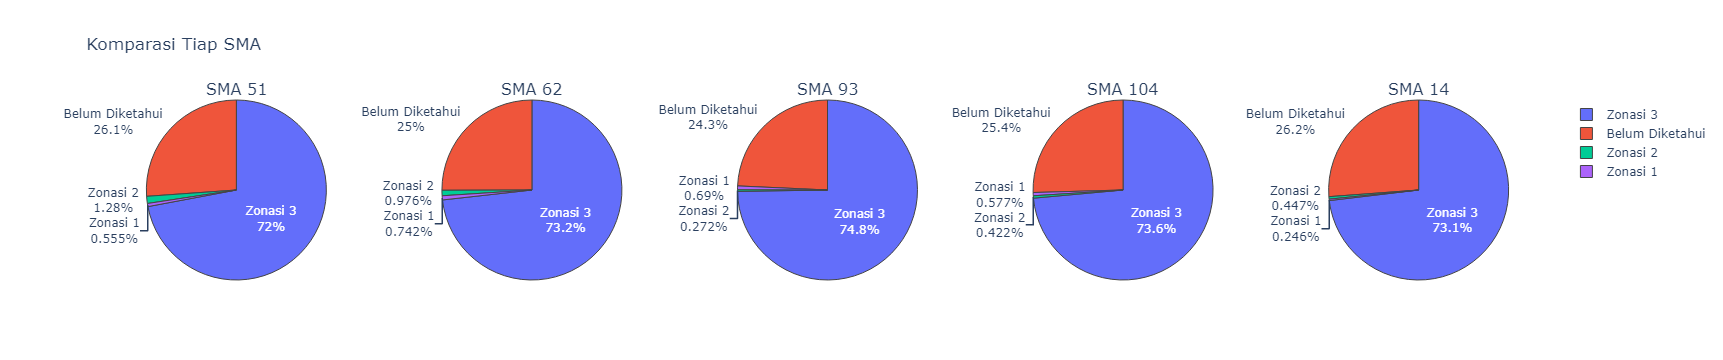

In [66]:
status_51 = df_51['Status Zonasi'].value_counts()
status_62 = df_62['Status Zonasi'].value_counts()
status_93 = df_93['Status Zonasi'].value_counts()
status_104= df_104['Status Zonasi'].value_counts()
status_14 = df_14['Status Zonasi'].value_counts()

labels_51 = status_51.index
labels_62 = status_62.index
labels_93 = status_93.index
labels_104= status_104.index
labels_14 = status_14.index

values_51 = status_51.values
values_62 = status_62.values
values_93 = status_93.values
values_104= status_104.values
values_14 = status_14.values

#colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = make_subplots(rows=1, cols=5, subplot_titles=['SMA 51', 'SMA 62', 'SMA 93', 'SMA 104', 'SMA 14'], specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels_51, values=values_51, name='SMA 51',  marker_line_width=1, textinfo='label+percent'), row=1, col=1)
fig.add_trace(go.Pie(labels=labels_62, values=values_62, name='SMA 62',  marker_line_width=1, textinfo='label+percent'), row=1, col=2)
fig.add_trace(go.Pie(labels=labels_93, values=values_93, name="SMA 93", marker_line_width=1, textinfo='label+percent'), row=1, col=3)
fig.add_trace(go.Pie(labels=labels_104, values=values_104, name="SMA 104", marker_line_width=1, textinfo='label+percent'), row=1, col=4)
fig.add_trace(go.Pie(labels=labels_14, values=values_14, name="SMA 14",  marker_line_width=1, textinfo='label+percent'), row=1, col=5)


fig.update_layout(title_text='Komparasi Tiap SMA')

fig.show()

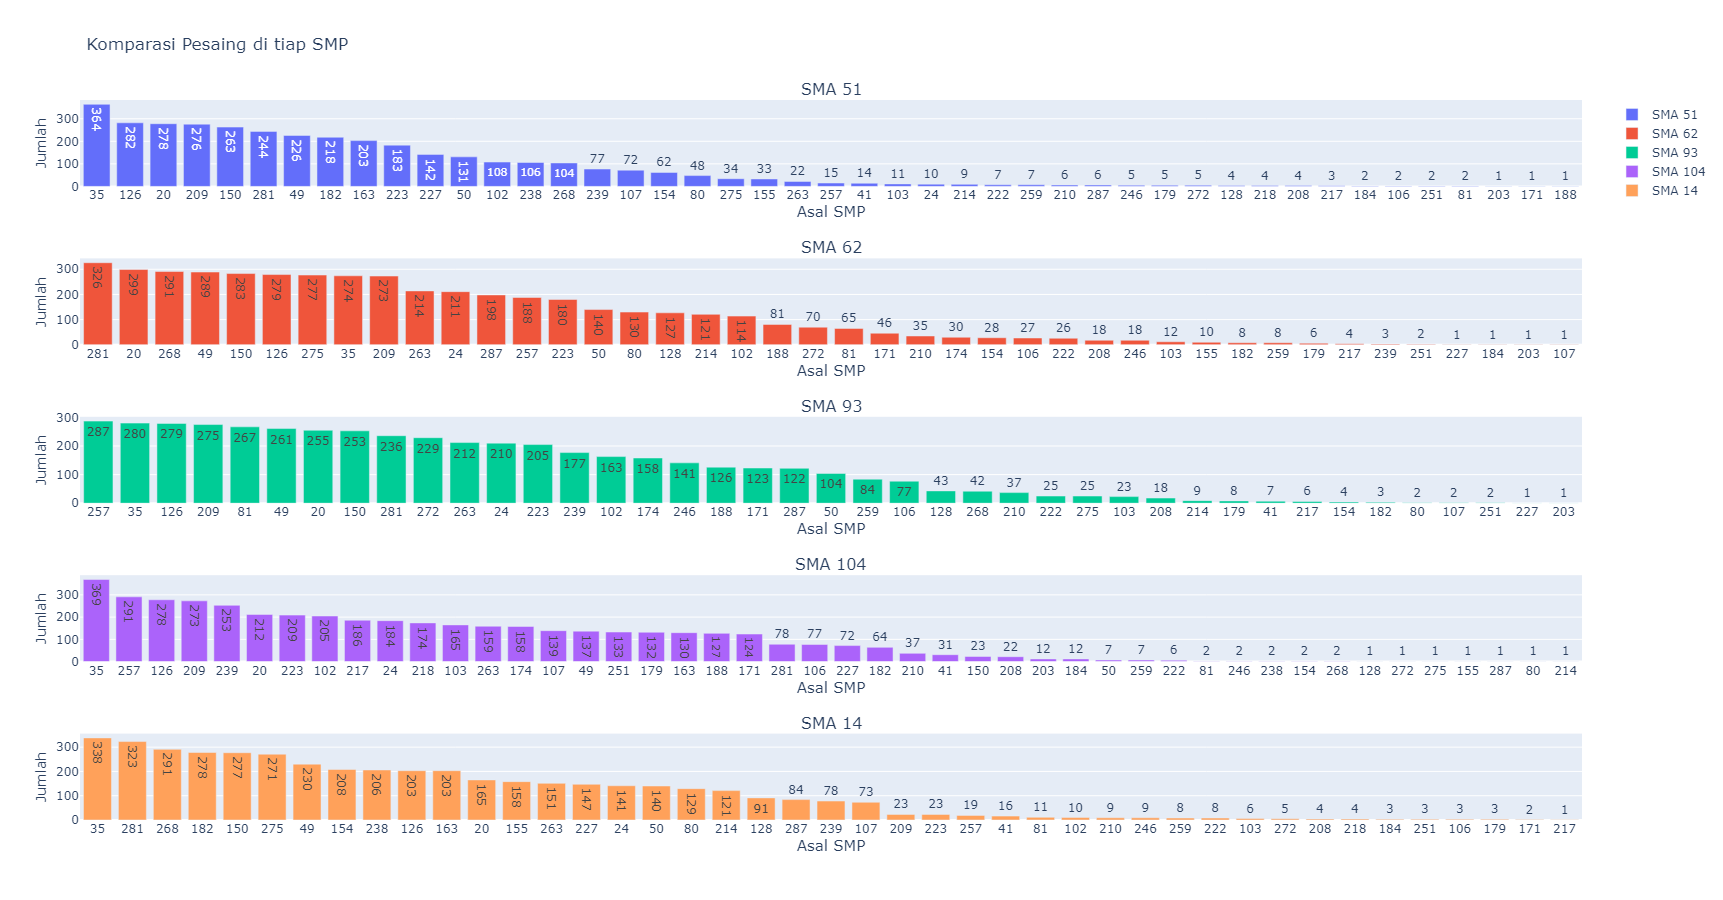

In [67]:
statuss_51 = df_51['Asal SMP'].value_counts()
statuss_62 = df_62['Asal SMP'].value_counts()
statuss_93 = df_93['Asal SMP'].value_counts()
statuss_104= df_104['Asal SMP'].value_counts()
statuss_14 = df_14['Asal SMP'].value_counts()

labelss_51 = statuss_51.index
labelss_62 = statuss_62.index
labelss_93 = statuss_93.index
labelss_104= statuss_104.index
labelss_14 = statuss_14.index

valuess_51 = statuss_51.values
valuess_62 = statuss_62.values
valuess_93 = statuss_93.values
valuess_104= statuss_104.values
valuess_14 = statuss_14.values

fig = make_subplots(rows=5, cols=1, subplot_titles=['SMA 51', 'SMA 62', 'SMA 93', 'SMA 104', 'SMA 14'], shared_yaxes=True)

fig.add_trace(go.Bar(x=labelss_51, y=valuess_51, name='SMA 51', text=valuess_51, textposition='auto'), row=1, col=1)
fig.add_trace(go.Bar(x=labelss_62, y=valuess_62, name='SMA 62', text=valuess_62, textposition='auto'), row=2, col=1)
fig.add_trace(go.Bar(x=labelss_93, y=valuess_93, name='SMA 93', text=valuess_93, textposition='auto'), row=3, col=1)
fig.add_trace(go.Bar(x=labelss_104, y=valuess_104, name='SMA 104', text=valuess_104, textposition='auto'), row=4, col=1)
fig.add_trace(go.Bar(x=labelss_14, y=valuess_14, name='SMA 14', text=valuess_14, textposition='auto'), row=5, col=1)

fig['layout'].update(height=900, width=1700, title='Komparasi Pesaing di tiap SMP')

fig.update_xaxes(
        tickangle = 0,
        title_text = "Asal SMP",
        title_font = {"size": 15},
        title_standoff = 0)

fig.update_yaxes(
        title_text = "Jumlah",
        title_standoff = 0)
fig.show()

In [68]:
# dataframe kuota tiap sekolah

data_ipa = {'Sekolah':['SMA 51', 'SMA 62', 'SMA 93', 'SMA 104', 'SMA 14'],
            'Kuota IPA':[70, 53, 64, 70, 88],
            'Kuota IPS':[70, 52, 41, 34, 70]}
sma = pd.DataFrame(data_ipa)
sma

,Sekolah,Kuota IPA,Kuota IPS
0,SMA 51,70,70
1,SMA 62,53,52
2,SMA 93,64,41
3,SMA 104,70,34
4,SMA 14,88,70


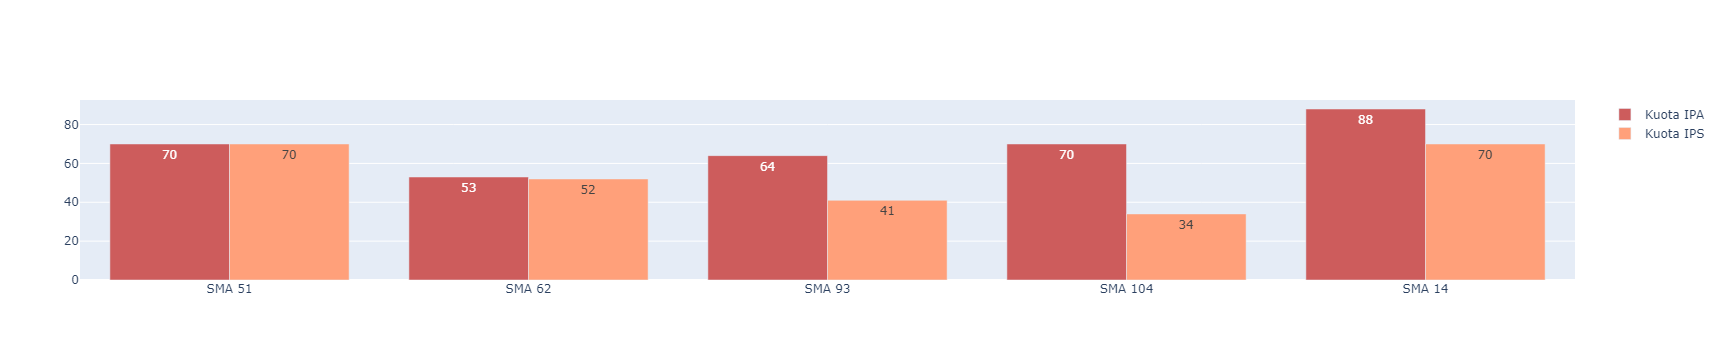

In [69]:
status_kuotaipa = sma['Kuota IPA'].value_counts
status_kuotaips = sma['Kuota IPS'].value_counts
label_ipa = sma['Sekolah']
label_ips = sma['Sekolah']
values_ipa = sma['Kuota IPA']
values_ips = sma['Kuota IPS']

fig = go.Figure()
fig.add_trace(go.Bar(x=label_ipa, y=values_ipa, text=values_ipa, name='Kuota IPA', marker_color='indianred'))

fig.add_trace(go.Bar(x=label_ips, y=values_ips, text=values_ips, name='Kuota IPS', marker_color='lightsalmon'))

fig.update_layout(barmode='group', xaxis_tickangle=0)
fig.show()

# 7. Kesimpulan

Karena Tyas Adira Rahayu Ningsih ingin memasuki jurusan IPA, maka yang di analisa hanya yang ada di jurusan IPA dengan asusmsi semua yang terdaftar di zonasi 1 dan 2 keinginanannya di jurusan IPA:
- SMA 51 kuota jurusan IPA 70 orang sedangkan total yang masuk melalui zonasi 1 dan 2 ada 66 orang sehingga sisa 4 kuota
- SMA 62 kuota jurusan IPA 53 orang sedangkan total yang masuk melalui zonasi 1 dan 2 ada 81 orang sehingga kelebihan 28 kuota
- SMA 93 kuota jurusan IPA 63 orang sedangkan total yang masuk melalui zonasi 1 dan 2 ada 46 orang sehingga sisa 17 kuota
- SMA 104 kuota jurusan IPA 70 orang sedangkan total yang masuk melalui zonasi 1 dan 2 ada 45 orang sehingga sisa 15 kuota
- SMA 14 kuota jurusan IPA 88 orang sedangkan total yang masuk melalui zonasi 1 dan 2 ada 31 orang sehingga sisa 57 kuota
    
    
Berdasarkan penjelasan diatas, peluang tertinggi untuk masuk SMA negeri jurusan IPA melalui jalur zonasi dengan kategori zonasi 3:
1. SMA 14
2. SMA 93
3. SMA 104
4. SMA 51
5. SMA 62


Kekurangan analisa:
- Peluang ini sifatnya tentatif karena hanya mengambil data peserta SMP Negeri sedangkan ada kemungkinan di SMP Swasta yang umurnya melebihi umur Tyas Adira Rahayu Ningsih
- Data yang baru bisa di analisa hanya yang Jalur Daftar nya hanya melalui Zonasi dan Afirmasi(KJP). Sedangkan yang melalui jalur selain ke duanya belum bisa di klasifikasikan masuk di zonasi 1 atau 2 karena pihak PPDB DKI Jakarta tidak mengisi value dari data RT. Ada 3513 orang dari jumlah Jalur Daftar selain Zonasi dan Afirmasi(KJP) yang belum termasuk didalam zonasi 1 atau zonasi 2.
- Umumnya lulusan SMP Negeri maupun Swasta belum tentu berkeinginan masuk SMA Negeri, ada juga yang berkeinginan masuk SMK Negeri atau swasta. Faktor ini menjadi salah 1 hal yang bisa diperhitungkan ketika dalam menganalisa. Selain itu lulusan SMP Negeri belum tentu mau masuk di SMA Negeri sebagai contoh lulusan SMP Negeri 281 di tahun 2012 yang dimana kebanyakan siswanya lebih minat di SMK Negeri dibanding SMA Negeri dan faktor lingkungan sekolah bisa mempengaruhi. Jika lingkungan sekolah mayoritas pergaulannya baik dan kalaupun buruk masih tinggi minat belajarnya, bisa di pastikan keinginannya mayoritas SMA Negeri. Contoh kasus yang lain seperti SMP Negeri 49 di tahun 2012 mayoritas pergaulannya baik dan minat belajarnya tinggi sehingga keinginan di SMA Negeri lebih tinggi walaupun masih ada yang berkeinginan masuk di SMK Negeri. Dengan alasan inilah anomali akan selalu ada apalagi dengan pergantian sistem PPDB yang dimana sebelum pandemi murni menggunakan nilai Ujian Nasional, setelah pandemi harus menyesuaikan sistem dan penggunaan nilai mulai di kurangi kuotanya. Akibatnya pola yang terbentuk sebelum pandemi seperti adanya sekolah favorit yang dimana kebanyakan muridnya berprestasi menjadi tidak ada. Sebagai contoh SMP Negeri 49 Jakarta merupakan salah 1 sekolah favorit/unggulan, setelah datangnya pandemi yang dimana masuk SMP menggunakan umur, banyak anak SD yang ingin melanjutkan ke SMP Negeri 49 menjadi takut karena SMP 49 sejak dahulu sudah di branding sekolah unggulan dan juga sekolahnya anak orang kaya. Faktor lain yang menjadikan murid tidak ingin lanjut ke SMA yaitu karena di SMA menurut mereka banyak belajar dan umumnya lanjut kuliah. Sedangkan jika di SMK pelajarannya tidak serumit di SMA dan lulus SMK bisa langsung kerja

`Dari uraian diatas, bisa disimpulkan untuk saat ini lebih baik mendaftar di SMA 14 karena kuotanya yang lumayan besar. Ketika sudah waktunya PPDB, disinilah peran seorang data analyst terus melihat perkembangan PPDB serta melaporkan siapa saja yang masuk SMK dan siapa saja yang masuk SMA melalui jalur akademik/non akademik, jalur afirmasi, dan yang terakhir jalur zonasi. Dengan membuat langkah seperti ini akan memudahkan calon PPDB menentukan prioritas urutan yang dipilih tentu berdasarkan data`

In [70]:
df_62 = df[df['Kelurahan'].isin(['Kramat Jati', 'Dukuh', 'Bale Kambang', 'Batu Ampar', 'Cawang', 'Cililitan', 'Rambutan', 'Gedong', 
                                 'Pinang Ranti', 'Kebon Pala', 'Tengah'])].sort_values('Umur', ascending=False).reset_index()

In [71]:
df_62

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Umur Convert,Asal SMP,Jalur Daftar,Status,umur tahun,umur bulan,umur hari
0,2,1,200103200320003,MUHAMMAD ABDUL RAHMAN,Batu Ampar,4,0,3.0,15 th 00 bl 28 hr,15.076712,20,Afirmasi (Inklusi),Daftar Ulang,15.0,0.000000,0.076712
1,3,17,200102200360004,MUZAKY HISBULLAH WIDIANTO,Dukuh,5,9,3.0,14 th 11 bl 29 hr,14.996119,24,Afirmasi (KJP),Daftar Ulang,14.0,0.916667,0.079452
2,5,1,200103201280002,TRI ZAHRINI,Batu Ampar,0,0,3.0,14 th 11 bl 23 hr,14.979680,126,Afirmasi (Inklusi),Daftar Ulang,14.0,0.916667,0.063014
3,6,6,200107202690014,KURNIAWAN DIANSAH,Pinang Ranti,1,2,3.0,14 th 11 bl 16 hr,14.960502,272,Zonasi,Daftar Ulang,14.0,0.916667,0.043836
4,7,8,200107200590084,ARVA SABILLILAH,Cililitan,7,12,3.0,14 th 11 bl 13 hr,14.952283,50,Zonasi,Daftar Ulang,14.0,0.916667,0.035616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4342,11911,32,200104201890082,NAUFAL HADI ADITYA,Rambutan,4,0,NaN,11 th 03 bl 20 hr,11.304795,208,Prestasi (Akademik),Daftar Ulang,11.0,0.250000,0.054795
4343,11915,59,200102202100046,REZA DWI PERMANA,Tengah,7,6,NaN,11 th 01 bl 09 hr,11.107991,209,Afirmasi (KJP),Daftar Ulang,11.0,0.083333,0.024658
4344,11918,9,200104202230079,ANANDA ZHAKI IBRAHIM,Gedong,3,0,NaN,11 th 00 bl 18 hr,11.049315,257,Prestasi (Akademik),Daftar Ulang,11.0,0.000000,0.049315
4345,11920,7,200104201280204,ZIYAD TRYSTAN RABBANI SARWONO,Batu Ampar,4,0,NaN,11 th 00 bl 03 hr,11.008219,126,Prestasi (Akademik),Tidak Daftar Ulang,11.0,0.000000,0.008219


In [ ]:
df_62.loc[df_62['Nama'].str.contains('Tyas Adira Rahayu Ningsih', case=False)] # melihat di posisi berapa value dari kolom Nama yaitu Tyas Adira Rahayu Ningsih

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Asal SMP,Jalur Daftar,Status
1413,63,64,200107200060003,TYAS ADIRA RAHAYU NINGSIH,Batu Ampar,5,7,3.0,12 th 11 bl 11 hr,49,Zonasi,Daftar Ulang


In [ ]:
df_104

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Asal SMP,Jalur Daftar,Status
0,398,1,200103200320003,MUHAMMAD ABDUL RAHMAN,Batu Ampar,4,0,3.0,15 th 00 bl 28 hr,20,Afirmasi (Inklusi),Daftar Ulang
1,1635,17,200102200360004,MUZAKY HISBULLAH WIDIANTO,Dukuh,5,9,3.0,14 th 11 bl 29 hr,24,Afirmasi (KJP),Daftar Ulang
2,10077,1,200107202180018,AHMAD FAJRI,Jati Padang,8,6,1.0,14 th 11 bl 24 hr,218,Zonasi,Daftar Ulang
3,996,1,200103201280002,TRI ZAHRINI,Batu Ampar,0,0,3.0,14 th 11 bl 23 hr,126,Afirmasi (Inklusi),Daftar Ulang
4,5678,46,200102202100027,MUHAMAD ISLAMI,Tengah,4,11,NaN,14 th 10 bl 27 hr,209,Afirmasi (KJP),Daftar Ulang
...,...,...,...,...,...,...,...,...,...,...,...,...
4492,6991,9,200104202230079,ANANDA ZHAKI IBRAHIM,Gedong,3,0,NaN,11 th 00 bl 18 hr,257,Prestasi (Akademik),Daftar Ulang
4493,937,7,200104201280204,ZIYAD TRYSTAN RABBANI SARWONO,Batu Ampar,4,0,NaN,11 th 00 bl 03 hr,126,Prestasi (Akademik),Tidak Daftar Ulang
4494,4389,54,200104201070065,FATUR DWI AGENG SELO,Baru,1,0,NaN,11 th 00 bl 00 hr,179,Prestasi (Akademik),Daftar Ulang
4495,11024,11,200104201830335,MUHAMMAD SYAHMI TRIHANDOKO,Tanjung Barat,5,0,NaN,10 th 09 bl 07 hr,154,Prestasi (Akademik),Daftar Ulang


In [ ]:
df_104.loc[df_104['Nama'].str.contains('Tyas Adira Rahayu Ningsih', case=False)]

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Asal SMP,Jalur Daftar,Status
1679,63,64,200107200060003,TYAS ADIRA RAHAYU NINGSIH,Batu Ampar,5,7,3.0,12 th 11 bl 11 hr,49,Zonasi,Daftar Ulang


In [ ]:
df_14 = df[df['Kelurahan'].isin(['Cililitan', 'Cawang', 'Rawajati', 'Pejaten Barat', 'Pejaten Timur', 'Bale Kambang', 
                                 'Batu Ampar', 'Dukuh', 'Kebon Pala', 'Makasar', 'Pancoran', 'Pengadegan', 
                                 'Kramat Jati', 'Cikoko', 'Duren Tiga', 'Kalibata', 'Kebon Baru'])].sort_values('Umur', ascending=False).reset_index()

In [ ]:
df_14

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Asal SMP,Jalur Daftar,Status
0,398,1,200103200320003,MUHAMMAD ABDUL RAHMAN,Batu Ampar,4,0,3.0,15 th 00 bl 28 hr,20,Afirmasi (Inklusi),Daftar Ulang
1,1635,17,200102200360004,MUZAKY HISBULLAH WIDIANTO,Dukuh,5,9,3.0,14 th 11 bl 29 hr,24,Afirmasi (KJP),Daftar Ulang
2,996,1,200103201280002,TRI ZAHRINI,Batu Ampar,0,0,3.0,14 th 11 bl 23 hr,126,Afirmasi (Inklusi),Daftar Ulang
3,2269,8,200107200590084,ARVA SABILLILAH,Cililitan,7,12,3.0,14 th 11 bl 13 hr,50,Zonasi,Daftar Ulang
4,252,15,200102200060218,ANGGI PRATIWI,Kramat Jati,11,10,2.0,14 th 10 bl 29 hr,49,Afirmasi (KJP),Tidak Naik Kelas
...,...,...,...,...,...,...,...,...,...,...,...,...
4462,11128,11,200107201550102,FELICIA BARUNA PUTRI NUR,Pengadegan,5,2,2.0,11 th 03 bl 26 hr,154,Zonasi,Daftar Ulang
4463,11332,17,200107201560059,ANDIKA JAHDAN TAZAKKA,Cikoko,5,3,2.0,11 th 03 bl 02 hr,155,Zonasi,Daftar Ulang
4464,11571,22,200107201640050,YUANITA VERA FIRDAYANTI,Kalibata,8,4,2.0,11 th 00 bl 11 hr,182,Zonasi,Daftar Ulang
4465,937,7,200104201280204,ZIYAD TRYSTAN RABBANI SARWONO,Batu Ampar,4,0,NaN,11 th 00 bl 03 hr,126,Prestasi (Akademik),Tidak Daftar Ulang


In [ ]:
df_14.loc[df_14['Nama'].str.contains('Tyas Adira Rahayu Ningsih', case=False)]

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Asal SMP,Jalur Daftar,Status
1441,63,64,200107200060003,TYAS ADIRA RAHAYU NINGSIH,Batu Ampar,5,7,3.0,12 th 11 bl 11 hr,49,Zonasi,Daftar Ulang


In [ ]:
df_51.to_excel('data_ppdb_sma51.xlsx')